# Curso de Optimización (DEMAT)
## Tarea 6

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Marzo 25, 2025**   |
| Fecha límite de entrega de la tarea: | **Abril  3, 2025**   |


### Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales. 
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimirlo 
  y puede anexar sólo el notebook en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No lo incluya dentro del ZIP**, porque la idea que lo pueda accesar 
  directamente para poner anotaciones y la calificación de cada ejercicio.



---

## Resuelto por Cesar Amilkar Rivera Covarrubias

In [18]:
import numpy as np 
import scipy as sc 
from funciones_prop import *
from tabulate import tabulate
import time
eps = np.finfo(float).eps

## Ejercicio 1 (3 puntos)

Considere las siguientes funciones y los puntos $\mathbf{x}_0$:


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
- $\mathbf{x}_0 = (2,3)$  
   
---

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
- $\mathbf{x}_0 = (2,4)$

--- 

**Función de Hartmann de dimensión 6 ([Referencia](https://www.sfu.ca/~ssurjano/hart6.html)):** 
Para $\mathbf{x}=(x_1,x_2, ..., x_6)$

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + 
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$

$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix},$$

$$
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$ 

- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

*NOTA 1:* Esta función tiene 6 óptimos locales. El óptimo global es 
$\mathbf{x}_* = (0.20169, 0.15001,  0.476874, 0.275332, 0.311652, 0.6573)$,
y $f(\mathbf{x}_*) = -3.0424$.

*NOTA 2:* Para esta función necesita calcular el gradiente y programar esta función
para usarla en los siguientes ejercicios.

---

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{200}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{600}$ 

---

1. Calcule y programe el Hessiano de cada función.
2. Escriba una función que recibe como entrada una matriz simétrica. La función hace lo siguiente:

-  Calcula los eigenvalores de la matriz. Puede usar la función `numpy.linalg.eigvalsh()`
   para calcular los eigenvalores.
-  Devuelve el eigenvalor más pequeño y el eigenvalor más grande.

3. Escriba una función que reciba el eigenvalor más pequeño $\lambda_1$ y el eigenvalor 
   más grande $\lambda_n$ de una matriz simétrica. La función imprime $\lambda_1$, $\lambda_n$ y un mensaje de acuerdo a las siguientes condiciones:
   
- Si $\lambda_1>0$, imprima `Matriz definida positiva`.
- Si $\lambda_n<0$, imprima `Matriz definida negativa`.
- Si $\lambda_1<0$ y $\lambda_n>0$, imprima `Matriz indefinida`.

4. Evalúe el Hessiano $\mathbf{H}_0$ en los puntos $\mathbf{x}_0$ dados y use la funciones de los 
   Punto 2 y 3 para indicar si la matriz es definida positiva o no.

### Solución:

Funciones que calculan el minimo y maximo eigenvector y si la matriz es definida positiva

In [19]:
def get_max_min_eigenval(A):
    eigens = np.linalg.eigvalsh(A)
    eigens = np.sort(eigens)
    return eigens[0], eigens[-1]

def its_hermitian(A, lmin, lmax):
    if lmin > 0:
        print("Matriz definida positiva")
    elif lmax < 0:
        print("Matriz definida negativa")
    else:
        print("Matriz indefinida")

Gradiente y hessiana de la función Beale

Comencemos definiendo 

$$
\begin{align*}
f_1(\mathbf{x}) &=: (1.5-x_1 + x_1x_2)^2, \\
f_2(\mathbf{x}) &=: (2.25 - x_1 + x_1x_2^2)^2, \\ 
f_3(\mathbf{x}) &=: (2.625 - x_1 + x_1x_2^3)^2.
\end{align*}
$$

De forma que 


$$ f(\mathbf{x}) =  f_1(\mathbf{x}) + f_2(\mathbf{x}) + f_3(\mathbf{x}). $$ 


Calculemoslas derivadas respecto a $x_1$. 

$$
\begin{align*}
\partial_{x_1} f_1  (\mathbf{x}) 
&= \partial_{x_1}  (1.5-x_1 + x_1x_2)^2 
&= 2(1.5-x_1 + x_1x_2) (-1 + x_2), \\ 
\partial_{x_1} f_2  (\mathbf{x}) 
&= \partial_{x_1} (2.25 - x_1 + x_1x_2^2)^2 
&= 2(2.25 - x_1 + x_1x_2^2) (-1 + x_2^2), \\ 
\partial_{x_1} f_3 (\mathbf{x}) 
&= \partial_{x_1} (2.625 - x_1 + x_1x_2^3)^2 
&= 2(2.625 - x_1 + x_1x_2^3) (-1 + x_2^3).
\end{align*}
$$

Sigamos con las derivadas respecto a $x_2$. 

$$
\begin{align*}
\partial_{x_2} f_1  (\mathbf{x}) 
&= \partial_{x_2}  (1.5-x_1 + x_1x_2)^2 
&= 2(1.5-x_1 + x_1x_2) (x_1), \\ 
\partial_{x_2} f_2  (\mathbf{x}) 
&= \partial_{x_2} (2.25 - x_1 + x_1x_2^2)^2 
&= 2(2.25 - x_1 + x_1x_2^2) (2x_1x_2), \\ 
\partial_{x_2} f_3 (\mathbf{x}) 
&= \partial_{x_2} (2.625 - x_1 + x_1x_2^3)^2 
&= 2(2.625 - x_1 + x_1x_2^3) (3x_1x_2^2).
\end{align*}
$$

Sigamos a calular la diagonal de la Hessiana que es la doble derivada de cada variable

$$
\begin{align*}
\partial_{x_1 x_1} f_1
&= \partial_{x_1} [2(1.5-x_1 + x_1x_2) (-1 + x_2)] 
&= 2[(-1 + x_2)(-1+x_2)], \\
\partial_{x_1 x_1} f_2 
&= \partial_{x_1} [ 2(2.25 - x_1 + x_1x_2^2) (-1 + x_2^2)]
&= 2[(-1 + x_2^2)(-1 + x_2^2)],  \\ 
\partial_{x_1x_1} f_3 
&= \partial_{x_1}  2(2.625 - x_1 + x_1x_2^3) (-1 + x_2^3) 
&= 2[(-1 +x_2^3)(-1 + x_2^3)]. \\ 
\end{align*}
$$

Luego, 

$$
\begin{align*}
\partial_{x_2 x_2} f_1  (\mathbf{x}) 
&= \partial_{x_2}  [2(1.5-x_1 + x_1x_2) (x_1)]
&= 2[(x_1)(x_1)], \\ 
\partial_{x_2 x_2} f_2  (\mathbf{x}) 
&= \partial_{x_2}[2(2.25 - x_1 + x_1x_2^2) (2x_1x_2) ]
&= 2[2(x_1x_2)(2x_1x_2) + (2.25 - x_1 + x_1x_2^2)(2x_1)], \\ 
\partial_{x_2 x_2} f_3 (\mathbf{x}) 
&= \partial_{x_2} [2(2.625 - x_1 + x_1x_2^3) (3x_1x_2^2)] 
&= 2[(3x_1x_2^2)(3x_1x_2^2) + (2.625 - x_1 + x_1x_2^3)(6x_1x_2)].
\end{align*}
$$

Por último, calculemos la derivada $\partial_{x_1 x_2}f(\mathbf{x}) = \partial_{x_2 x_1}f(\mathbf{x}) $. 

$$
\begin{align*}
\partial_{x_2 x_1} f_1  (\mathbf{x}) 
&= \partial_{x_1} 2(1.5-x_1 + x_1x_2) (x_1) 
&= 2[(-1 + x_2)(x_1) + ((1.5-x_1 + x_1x_2))], \\ 
\partial_{x_2 x_1} f_2  (\mathbf{x}) 
&= \partial_{x_1} 2(2.25 - x_1 + x_1x_2^2) (2x_1x_2)
&= 2[(-1 + x_2^2)(2x_1x_2) + 2(2.25 - x_1 + x_1x_2^2)(2x_2)], \\ 
\partial_{x_2 x_1} f_3 (\mathbf{x}) 
&= \partial_{x_1} 2(2.625 - x_1 + x_1x_2^3) (3x_1x_2^2)
&= 2[(-1 + x_2^3)(3x_1x_2^2) + (2.625 - x_1 + x_1x_2^3)(3x_2^2)].
\end{align*}
$$

Obteniendo así el gradiente y la hessiana de la funcion Beale. 

In [20]:
x0 = [2., 3.]

hes = hess_fun_Beale(x0)

l1, l2 = get_max_min_eigenval(hes)
its_hermitian(hes, l1, l2)

print(tabulate(hes))

Matriz indefinida
-------  --------
1488      6187.75
6187.75  10207
-------  --------


### Gradiente y Hessiana de la función de Himmelblau

#### Comencemos calculando el gradiente 

$$ 
\begin{align*}
\partial_{x1} f     
&= \partial_{x1} (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2  \\ 
&= 2(x_1^2 + x_2 - 11)   2 (x1)  + 2(x_1 + x_2^2 - 7) 
\end{align*}$$


$$ 
\begin{align*}
    \partial_{x2} f 
    &= \partial_{x2} (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2 \\ 
    &= 2(x_1^2 + x_2 - 11) + 2(x_1 + x_2^2 - 7) (2x_2)
\end{align*}
$$


#### Hesiana
Luego, calculemos las segundas derivadas

$$
\begin{align*}
\partial_{x_1 x_1} f 
&= \partial_{x_1} [2(x_1^2 + x_2 - 11) 2 (x1)  + 2(x_1 + x_2^2 - 7) ]\\
&= 2[2[(2x_1^2) + (x_1^2 + x_2 - 11)] + 1].
\end{align*}
$$


$$
\begin{align*}
    \partial_{x_2 x_2} f 
    &= \partial_{x_2} [2(x_1^2 + x_2 - 11) + 2(x_1 + x_2^2 - 7) (2x_2)] \\ 
    &= 2[ 1 + (2x_2)(2x_2) + (x_1 + x_2^2 - 7)(2)  ].
\end{align*}
$$

Y las derivadas cruzadas. 

$$
\begin{align*}
    \partial_{x_2 x_1} f
    &= \partial_{x_2} (2(x_1^2 + x_2 - 11)   2 (x1)  + 2(x_1 + x_2^2 - 7)) \\ 
    &= 4x_1 + 2(2x_2)
\end{align*}
$$





In [21]:
x0 = [2., 4.]

hes = hess_fun_Himmenlblau(x0)

l1, l2 = get_max_min_eigenval(hes)
its_hermitian(hes, l1, l2)

print(tabulate(hes))

Matriz definida positiva
--  ---
22   24
24  174
--  ---


### Gradiente y Hessiana de la funcion de Hartman 

#### Gradiente 

Sea $k \in \{1, 2, 3, 4, 5, 6\}$, tenemos que la derivada parcial para $x_k$ está dada por

$$
\begin{align*}
    \partial{x_k} f 
    &= \partial{x_k} \left ( - \frac{1}{1.94}\sum_{i=1}^4\alpha_i \exp \left ( -\sum_{j=1}^6 a_{ij}(x_j - p _{ij})^2 \right )  \right ) \\ 
    &=  - \frac{1}{1.94}\sum_{i=1}^4\alpha_i \exp \left ( -\sum_{j=1}^6 a_{ij}(x_j - p _{ij})^2 \right ) \cdot \partial_{x_k}  \left ( -\sum_{j=1}^6 a_{ij}(x_j - p _{ij})^2  \right ) \\ 
    &=  - \frac{1}{1.94}\sum_{i=1}^4\alpha_i \exp \left ( -\sum_{j=1}^6 a_{ij}(x_j - p _{ij})^2 \right ) \cdot (2a_{ik} (x_k - p_{ik})) \\ 
\end{align*}
$$

#### Hesiana

Calculemos las segundas derivadas parciales, para $n \in \{1, 2, 3, 4, 5, 6\} $, tenemos que 

$$
\begin{align*}
\partial_{x_n x_k} f 
&= \partial_{x_n} \left ( - \frac{1}{1.94}\sum_{i=1}^4\alpha_i \exp \left ( -\sum_{j=1}^6 a_{ij}(x_j - p _{ij})^2 \right ) \cdot (2a_{ik} (x_k - p_{ik})) \right ) \\ 
&= \left ( - \frac{1}{1.94}\sum_{i=1}^4\alpha_i \exp \left ( -\sum_{j=1}^6 a_{ij}(x_j - p _{ij})^2 \right ) \cdot \partial_{x_n}(2a_{ik} (x_k - p_{ik})) \right ) \cdot (2a_{in} (x_n - p_{in}) ) ,\\ 
\end{align*}
$$

notemos que 

$$
\partial_{x_n}(2a_{ik} (x_k - p_{ik})) 
\begin{cases}
2_{ik} & \text { si } n = k   \\ 
0 & \text{ si } n \neq k \\ 
\end{cases}
$$


In [22]:
x0 = np.zeros(6)

hes = hes_fun_Hartman(x0)

l1, l2 = get_max_min_eigenval(hes)
its_hermitian(hes, l1, l2)

print(tabulate(hes))


Matriz indefinida
------------  ------------  ------------  ------------  ------------  ------------
 0.00171585   -0.000353523  -0.0065002    -3.997e-05    -0.00200086   -0.00040473
-0.000353523   0.00064241   -0.00252123   -4.22545e-05  -0.000795351  -0.000158067
-0.0065002    -0.00252123   -0.0424546    -0.000186059  -0.0143639    -0.00291614
-3.997e-05    -4.22545e-05  -0.000186059   0.000679679  -0.000137108  -1.60991e-05
-0.00200086   -0.000795351  -0.0143639    -0.000137108  -0.00353413   -0.000896308
-0.00040473   -0.000158067  -0.00291614   -1.60991e-05  -0.000896308   8.08107e-05
------------  ------------  ------------  ------------  ------------  ------------


### Rosenbrock

#### Gradiente  

Anteriormente hemos visto que el gradiente de esta función de $x_i$  para $1 < i  < n$ está dado por 

$$
\partial_{x_i} f = -400(x_{i+1} - x_i ^2)x_i + 2(x_i -1) + 200 * (x_i - x_{i-1}^2) * 2x_i, 
$$

mientras que para $x_1$ y $x_n$ tenemos 

$$
\partial_{x_1} f= -400(x_2 - x_1^2)x_1 + 2(x_1 - 1)
\quad \text{ y } \quad
\partial_{x_n} f = 200(x_n - x_{n-1}^2).
$$


#### Hesiana

Obtengamos la doble derivada para $i = 1$
$$
\begin{align*}
\partial_{x_1} \left( -400(x_2 - x_1^2)x_1 + 2(x_1 - 1) \right )
&= -400 ((-2x_1)x_1 + (x_2 - x_1^2)) + 2 \\ 
&= 1200 x_1^2 - 400x_2 + 2.
\end{align*}
$$

Para $ i = n$ 
$$
\begin{align*}
\partial_{x_n} 200(x_n - x_{n-1}^2) 
&= 200. 
\end{align*}
$$


Calculemos la doble derivada para el caso general 

$$
\begin{align*}
\partial_{x_i x_i} f 
&= \partial_{x_i} \left ( -400(x_{i+1} - x_i ^2)x_i + 2(x_i -1) + 200 * (x_i - x_{i-1}^2) * 2x_i \right ) \\
&= -400 ((-2x_i)x_i  + (x_{i+1} - x_i^2)) + 2 + 200 * (2x_i + (x_i - x_{i-1}^2)2) \\ 
&= -1200 x_i ^2 - 400 x_{i+1} + 202
\end{align*}
$$

Sigamos con la derivada cruzada, notemos que solo estamos interesados cuando $j = i + 1$ o $j = i-1$, pues en el resto de los casos, la derivada es 0. Comencemos con $j = i + 1$

$$
\begin{align*}
\partial_{x_j x_i} f 
&= \partial_{x_{i+1}} \left ( -400(x_{i+1} - x_i ^2)x_i + 2(x_i -1) + 200 * (x_i - x_{i-1}^2) * 2x_i \right ) \\ 
&= -400x_i
\end{align*}
$$

Luego, para $j = i -1$ 

$$
\begin{align*}
\partial_{x_j x_i} f 
&= \partial_{x_{i-1}}  \left ( -400(x_{i+1} - x_i ^2)x_i + 2(x_i -1) + 200 * (x_i - x_{i-1}^2) * 2x_i \right )  \\ 
&= 400 * (-2x_{i-1})x_i
\end{align*}
$$

In [23]:
x0 = [2., 4.]

hes = hes_fun_Rosenbrock(x0)

l1, l2 = get_max_min_eigenval(hes)
its_hermitian(hes, l1, l2)

print(tabulate(hes))

Matriz definida positiva
----  ----
3202  -800
-800   200
----  ----


---


```



``` 

## Ejercicio 2 (4 puntos)

Programar el método de Newton con tamaño de paso $\alpha_k$ inexacto usando el algoritmo de 
backtracking usando la condición de descenso suficiente.

> La función que implementa el método de Newton recibe como parámetros:
> - la función objetivo $f: \mathbb{R}^n \rightarrow \mathbb{R}$,
> - el gradiente $g(\mathbf{x})$ de la función objetivo, 
> - la Hessiana $H(\mathbf{x})$ de la función $f$, 
> - el punto inicial $\mathbf{x}_0$,
> - un número máximo de iteraciones $N$, 
> - la  tolerancia $\tau>0$, y
> - los parámetros $\alpha_{ini}, c_1$, $\rho$ y el número máximo de iteraciones $N_b$ para el algoritmo de backtracking.
> 
> Fijar $m=0$.
> 
> Para $k=0, 1, ..., N-1$ repetir los siguientes pasos:
> 1. Calcular el gradiente $\mathbf{g}_k$ en el punto $\mathbf{x}_k$:
>    $\;\mathbf{g}_k = g(\mathbf{x}_k)$.
> 2. Si $\|\mathbf{g}_k\| < \tau$,  hacer  $res=1$ y terminar el ciclo. 
> 3. Si no se cumple el criterio de paro, calcular la Hessiana  en el punto 
>    $\mathbf{x}_k$: $\mathbf{H}_k=H(\mathbf{x}_k)$.
> 4. Intentar calcular la factorización de Cholesky de $\mathbf{H}_k$.
>    Si la factorización es exitosa, $\mathbf{H}_k=\mathbf{L}\mathbf{L}^\top$, 
>    resolver el sistema de ecuaciones 
>    $\mathbf{L}\mathbf{L}^\top \mathbf{p}_k = -\mathbf{g}_k$ para obtener 
>    la dirección de descenso $\mathbf{p}_k$.
> 5. Si falla el cálculo de la factorización, definir la dirección de descenso como 
>    $\mathbf{p}_k = -\mathbf{g}_k$ y hacer $m = m+1$.
> 6. Calcular el tamaño de paso $\alpha_k$ usando el algoritmo de backtracking con la
>    condición de descenso suficiente. 
> 7. Calcular el siguiente punto de la secuencia como
>    $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$.
> 
>  Devolver el punto $\mathbf{x}_k$, $\;\mathbf{g}_k$, $\;k$, $\;m$ y $\;res$.
>
> .


**Nota:** Para calcular la factorización de Cholesky y resolver el sistema de ecuaciones
puede usar las funciones `scipy.linalg.cho_factor` y `scipy.linalg.cho_solve`.
Si la matriz no es definida positiva, la función `cho_factor` lanza la excepción
`scipy.linalg.LinAlgError`. Puede manejar este error mediante una excepción en la que
se defina la dirección de descenso como $-\mathbf{g}_k$.



1. Programe la función que implementa el algoritmo del método de Newton.
   Si la dimensión de las variables es 2, almacene 
   los puntos $\mathbf{x}_0, \mathbf{x}_1,...,\mathbf{x}_k$ que genera el algoritmo
   y haga que la función devuelva esta lista para usarlos para graficar la trayectoria.
2. Pruebe el algoritmo con las funciones del Ejercicio 1 usando los puntos iniciales
   $\mathbf{x_0}$ indicados, el número de iteraciones máximas $N=10000$ y la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina.
   Para el algoritmo del backtraking use $\alpha_{ini}=1$, $c_1=0.1$, $\rho=0.6$ y el máximo de iteraciones $N_b=100$.

   Imprima los valores siguientes:
- $f(\mathbf{x}_0)$.
- Imprimir el número de iteraciones $k$.
- Imprimir el número $m$ de veces en que $\mathbf{H}_k$ no fue definida positiva.
- El valor de $res$.
- La norma $\|\mathbf{g}_k\|$.
- Si $n<=6$, imprimir $\mathbf{x}_k$. En caso contrario, imprimir las primeras y
  las últimas 3 componentes de  $\mathbf{x}_k$.
- $f(\mathbf{x}_k)$.

   Además, si la dimensión de la variable es $n=2$, grafique los contornos de nivel de la función
   y la trayectoria  definida por los puntos $\mathbf{x}_0, \mathbf{x}_1,...,\mathbf{x}_k$.
   
3. Revise el valor del contador $m$ y escriba un comentario sobre si el algoritmo
   se comporta más como el método de descenso máximo o como el método de Newton, y la necesidad de modificar la matriz Hessiana.
   
### Solución:

In [24]:
def metNewton (f, grad_f, hes_f, x0, N=10000, tol=1e-8, a_ini =1, c1=0.1, rho=0.6, Nb=100):
    if tol < 0:
        raise ValueError(f"Valor invalido para la tolerancia {tol}")
    n = len(x0)
    m = 0
    x = np.asarray(x0)

    gk = grad_f(x)
    hk = hes_f(x)
    sec = []
    for k in range(N):

        if np.linalg.norm(gk) < tol:
            return x, gk, k, m, True, sec

        
        try:
            c, low = sc.linalg.cho_factor(hk)
            pk = sc.linalg.cho_solve((c, low), -gk)
        except sc.linalg.LinAlgError:
            pk = -np.asarray(gk)
            m = m+1

        alpha, _= back_suficiente(x, f, f(x), gk, pk, a_init=a_ini, c1=c1, rho=rho, N=Nb)

        x = x + alpha * pk 
        gk = grad_f(x)
        hk = hes_f(x)
        if n == 2:
            sec.append(x)

    return x, gk, N, m, False, sec

In [25]:
def prueba_funcion (f, grad_f, hes_f, x0, itera = 10000):
    n = len(x0)

    start_time = time.time()
    x, gk, k, m, flag, sec = metNewton(f, grad_f, hes_f, x0, tol=(n*eps)**(1/2), N=itera)
    end_time = time.time()


    print(f"f(x0): {f(x0):.4f}")
    print("k:", k)
    print("Se cumplio la condicion de convergencia: ", flag)
    print(f"||gk||: {np.linalg.norm(gk):0.4f}")
    if len(x) <= 6:
        print(f"xk: {[f'{xi: .4f}' for xi in x]}") 
    else:
        print(f"xk: {[f'{xi: .4f}' for xi in x[:3]]}  ...  {[f'{xi: .4f}' for xi in x[-3:]]}")

    print(f"f(xk): {f(x):.4f}")
    print("m: ", m)
    print(f"Porcentaje de reinicios: {m/k*100: 00.2f}%")
    print(f"Tiempo de ejecucion: {end_time - start_time:0.4f}",  )
    if len(x0) == 2:
        xl = -4.5
        xr = 4.5 
        ybottom = -4.5 
        ytop = 4.5 
        print("Contornos: ")
        contornos = [f(x) for x in sec]
        contornos.sort()
        plot2DFnc(f, xl, xr, ybottom, ytop, contornos)
        trayectorias2D(sec) 


Resultados Himmenlblau
f(x0): 130.0000
k: 6
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 2.0000']
f(xk): 0.0000
m:  0
Porcentaje de reinicios:  0.00%
Tiempo de ejecucion: 0.0010
Contornos: 


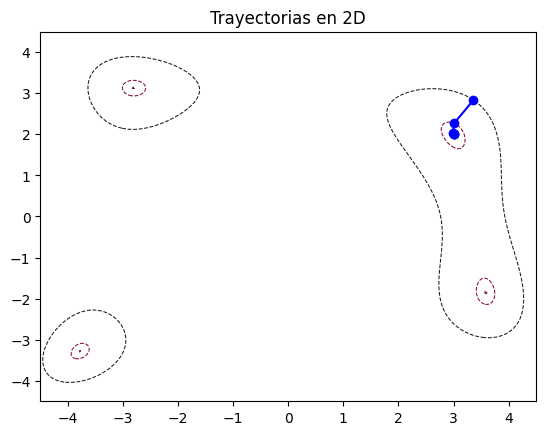


Resultados Beale
f(x0): 14.2031
k: 9
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 0.5000']
f(xk): 0.0000
m:  2
Porcentaje de reinicios:  22.22%
Tiempo de ejecucion: 0.0000
Contornos: 


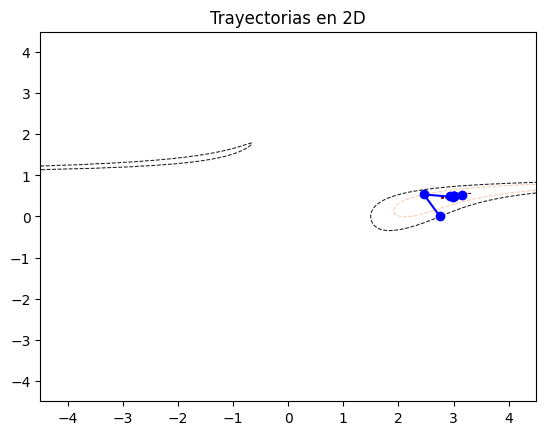


Resultados Hartman
f(x0): -1.3300
k: 32
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 0.1312', ' 0.1699', ' 0.5570', ' 0.0129', ' 0.8278', ' 0.5901']
f(xk): -1.8456
m:  28
Porcentaje de reinicios:  87.50%
Tiempo de ejecucion: 0.1317

Resultados Rosenbrock n=2
f(x0): 24.2000
k: 21
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 1.0000', ' 1.0000']
f(xk): 0.0000
m:  0
Porcentaje de reinicios:  0.00%
Tiempo de ejecucion: 0.0020
Contornos: 


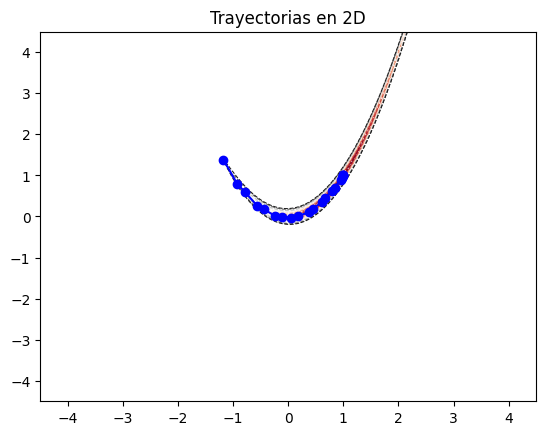


Resultados Rosenbrock n=200
f(x0): 50336.0000
k: 10000
Se cumplio la condicion de convergencia:  False
||gk||: 6.2680
xk: ['-0.9933', ' 0.9966', ' 0.9984']  ...  [' 0.0102', ' 0.0100', ' 0.0001']
f(xk): 125.7087
m:  9996
Porcentaje de reinicios:  99.96%
Tiempo de ejecucion: 80.6369

Resultados Rosenbrock n=600
f(x0): 50835.0000
k: 886
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: ['-0.9933', ' 0.9967', ' 0.9983']  ...  [' 1.0000', ' 1.0000', ' 1.0000']
f(xk): 3.9866
m:  0
Porcentaje de reinicios:  0.00%
Tiempo de ejecucion: 10.0551


In [26]:
#prueba Beale 

x0 = [2., 4.]

# x, gk, iter, m, flag, sec = metNewton(fun_Himmenlblau, grad_Himmenlblau, hess_fun_Himmenlblau, x0, tol=(n*eps)**(1/2))
print("Resultados Himmenlblau")
prueba_funcion(fun_Himmenlblau, grad_Himmenlblau, hess_fun_Himmenlblau, x0)

print()
x0 = [0., 0.]
print("Resultados Beale")
prueba_funcion(fun_Beale, grad_fun_Beale, hess_fun_Beale, x0)


print()
x0 = np.zeros(6)
print("Resultados Hartman")
prueba_funcion(fun_Hartman, grad_fun_Hartman, hes_fun_Hartman, x0)

print()
x0 = [-1.2, 1.0]
print("Resultados Rosenbrock n=2")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0)

print()
x0 = np.zeros(200)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=200")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0)

print()

x0 = np.zeros(600)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=600")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0)


##### Analisis del valor de m

En general, las funciones que analizamos tienen diferentes procentajes de reinicios, tenemos funciones que tuvieron cero reinicios como la función de Himmenlblau y la función de Rosenbrock para dimensión 2 y 600, por otro lado, esta misma función para dimensión 200 tuvo el 99.96% de reinicios, es de observarse que en este mismo caso, el algotirmo no convergio y no se acerco al óptimo tanto como las otras ejecuciones. 

Además, tenemos el caso de la función de Hartman que, si bien, también tiene un alto porcentaje de reinicios, en este caso, el algoritmo si converge, en menos de 50 iteraciones.

El valor de $m$ representa la cantidad de veces que el algoritmo no pudo concretar la factorización de Cholesky, el valor es muy grande podemos concluir que la hessiana de la función es una matriz que no es positiva definda, por lo que aplicar el método de Newton no representa una ventaja significativa. Una opción para evitar el valor de $m$ es aplicar perturbaciones no muy grandes que permitan que la matriz sea positiva definida, como en el siguiente ejercicio, sin embargo, si la perturbacion pequeña no es suficiente, considero que lo mejor será utilizar la variante de descenso de gradiente, ya que realizar perturbaciones grandes puede ocasionar comportamientos no deseados, profundizare en ello en el siguiente ejercicio.

Por otro lado, si el porcentaje es pequeño, concluimos que utilizar el método de Newton sí representa una ventaja. 

## Ejercicio 3 (3 puntos)

Modifique el algoritmo del método de Newton del Ejercicio 2 que implementa el algoritmo del
método de Newton reemplazando el Paso 4 (Intentar calcular la factorización de Cholesky)
y el Paso 5 (Si falla el cálculo de la factorización) para que quede de la siguiente manera:  


> La función que implementa el método de Newton recibe como parámetros:
> - la función objetivo $f: \mathbb{R}^n \rightarrow \mathbb{R}$,
> - el gradiente $g(\mathbf{x})$ de la función objetivo, 
> - la Hessiana $H(\mathbf{x})$ de la función $f$, 
> - el punto inicial $\mathbf{x}_0$,
> - un número máximo de iteraciones $N$, 
> - la  tolerancia $\tau>0$, 
> - **un incremento** $\delta>0$,y
> - los parámetros $\alpha_{ini}, c_1$, $\rho$ y el número máximo de iteraciones $N_b$ para el algoritmo de backtracking.
>
> Definir $\epsilon = \sqrt{\epsilon_m}$.
> 
> Para $k=0, 1, ..., N-1$ repetir los siguientes pasos:
> 1. Calcular el gradiente $\mathbf{g}_k = g(\mathbf{x}_k)$ en el punto $\mathbf{x}_k$.
> 2. Si $\|\mathbf{g}_k\| < \tau$,  hacer  $res=1$ y terminar el ciclo. 
> 3. Si no se cumple el criterio de paro, calcular la Hessiana  $\mathbf{H}_k=H(\mathbf{x}_k)$ en $\mathbf{x}_k$.
> 4. Usar la función del Punto 2 del Ejercicio 1 para obtener el eigenvalor
>    más pequeño $\lambda_1$ de $\mathbf{H}_k$. 
> 5. Si $\lambda_1<\epsilon$, modificar la Hessiana sumando $\delta + |\lambda_1|$ a los elementos
>    de la diagonal. Es decir se reemplaza  $\mathbf{H}_k$ por la matriz 
>    $\mathbf{H}_k+(\delta + |\lambda_1|)\mathbf{I}$, donde $\mathbf{I}$ es la matriz identidad, lo cual
>    hace que todos los eigenvalores de la matriz sean positivos y mayores que $\delta$.
> 6. Calcular la factorización de Cholesky $\mathbf{L}\mathbf{L}^\top$ de la matriz modificada.
> 7. Resolver el sistema de ecuaciones $\mathbf{L}\mathbf{L}^\top \mathbf{p}_k = -\mathbf{g}_k$ para obtener 
>    la dirección de descenso $\mathbf{p}_k$.
> 8. Calcular el tamaño de paso $\alpha_k$ usando el algoritmo de backtracking con la
>    condición de descenso suficiente. 
> 9. Calcular $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$.
> 
> Devolver el punto $\mathbf{x}_k$, $\;\mathbf{g}_k$, $\;k$ y $\;res$.
> 
> .

1. Programe la función que implementa el algoritmo anterior.
2. Repita las pruebas del Ejercicio 2 usando $\delta=0.001$ y $\delta=10.0$.
3. Repita la prueba para la función de Rosenbrock con $\delta=100.0$.
4. En este algoritmo se tiene un costo adicional por el cálculo de los eigenvalores de la matriz Hessiana,
   el cual se incrementa conforme aumenta el valor de $n$. Explique si conviene hacer este cambio
   y qué tan sensible es el algoritmo al cambiar el valor de $\delta$.

### Solución:

In [27]:
def metNewton_eigens (f, grad_f, hes_f, x0, delta, N=10000, tol=1e-8, a_ini =1, c1=0.1, rho=0.6, Nb=100):
    if tol < 0:
        raise ValueError(f"Valor invalido para la tolerancia {tol}")
    if delta < 0:
        raise ValueError(f"Valor invalido para el incremento {delta}")

    sqrt_eps = np.sqrt(np.finfo(float).eps)

    n = len(x0)
    x = np.asarray(x0)
    for k in range(N):
        gk = grad_f(x)

        if np.linalg.norm(gk) < tol:
            return x, gk, k, True
        
        Hk = hes_f(x)
        l, _ = get_max_min_eigenval(Hk)

        if l < sqrt_eps:
            mod = delta + abs(l)
            Hk = Hk + mod*np.eye(n)
            
        try:
            c, low = sc.linalg.cho_factor(Hk)
            pk = sc.linalg.cho_solve((c, low), -gk)
        except sc.linalg.LinAlgError:
            print("La matriz no es definida positiva")

        alpha, _= back_suficiente(x, f, f(x), gk, pk, a_init=a_ini, c1=c1, rho=rho, N=Nb)
        
        x = x + alpha*pk

    return x, gk, N, False

In [28]:
def prueba_funcion (f, grad_f, hes_f, x0, iter = 10000, delta = 0.01):
    n = len(x0)

    start_time = time.time()
    x, gk, k, flag = metNewton_eigens(f, grad_f, hes_f, x0, delta=delta, tol=(n*eps)**(1/2), N=iter)
    end_time = time.time()


    print(f"f(x0): {f(x0):.4f}")
    print("k:", k)
    print("Se cumplio la condicion de convergencia: ", flag)
    print(f"||gk||: {np.linalg.norm(gk):0.4f}")
    if len(x) <= 6:
        print(f"xk: {[f'{xi: .4f}' for xi in x]}") 
    else:
        print(f"xk: {[f'{xi: .4f}' for xi in x[:3]]}  ...  {[f'{xi: .4f}' for xi in x[-3:]]}")

    print(f"f(xk): {f(x):.4f}")
    print(f"Tiempo de ejecucion: {end_time - start_time:0.4f}",  )



In [29]:
delta = 0.001

print(f"------------------Resultados para {delta}-----------------------")
#prueba Beale 

x0 = [2., 4.]

# x, gk, iter, m, flag, sec = metNewton(fun_Himmenlblau, grad_Himmenlblau, hess_fun_Himmenlblau, x0, tol=(n*eps)**(1/2))
print("Resultados Himmenlblau")
prueba_funcion(fun_Himmenlblau, grad_Himmenlblau, hess_fun_Himmenlblau, x0, delta = delta)

print()
x0 = [0., 0.]
print("Resultados Beale")
prueba_funcion(fun_Beale, grad_fun_Beale, hess_fun_Beale, x0, delta = delta)


print()
x0 = np.zeros(6)
print("Resultados Hartman")
prueba_funcion(fun_Hartman, grad_fun_Hartman, hes_fun_Hartman, x0, delta = delta)

print()
x0 = [-1.2, 1.0]
print("Resultados Rosenbrock n=2")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)

print()
x0 = np.zeros(200)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=200")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)

print()

x0 = np.zeros(600)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=600")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)


------------------Resultados para 0.001-----------------------
Resultados Himmenlblau
f(x0): 130.0000
k: 6
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 2.0000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0025

Resultados Beale
f(x0): 14.2031
k: 9
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 0.5000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0043

Resultados Hartman
f(x0): -1.3300
k: 8
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 0.1312', ' 0.1699', ' 0.5570', ' 0.0129', ' 0.8278', ' 0.5901']
f(xk): -1.8456
Tiempo de ejecucion: 0.0360

Resultados Rosenbrock n=2
f(x0): 24.2000
k: 21
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 1.0000', ' 1.0000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0042

Resultados Rosenbrock n=200
f(x0): 50336.0000
k: 303
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: ['-0.9933', ' 0.9967', ' 0.9983']  ...  [' 1.0000', ' 1.0000', ' 1.0000']
f(xk

In [30]:
delta = 10.

print(f"------------------Resultados para {delta}-----------------------")
#prueba Beale 

x0 = [2., 4.]

# x, gk, iter, m, flag, sec = metNewton(fun_Himmenlblau, grad_Himmenlblau, hess_fun_Himmenlblau, x0, tol=(n*eps)**(1/2))
print("Resultados Himmenlblau")
prueba_funcion(fun_Himmenlblau, grad_Himmenlblau, hess_fun_Himmenlblau, x0, delta = delta)

print()
x0 = [0., 0.]
print("Resultados Beale")
prueba_funcion(fun_Beale, grad_fun_Beale, hess_fun_Beale, x0, delta = delta)


print()
x0 = np.zeros(6)
print("Resultados Hartman")
prueba_funcion(fun_Hartman, grad_fun_Hartman, hes_fun_Hartman, x0, delta = delta)

print()
x0 = [-1.2, 1.0]
print("Resultados Rosenbrock n=2")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)

print()
x0 = np.zeros(200)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=200")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)

print()

x0 = np.zeros(600)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=600")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)


------------------Resultados para 10.0-----------------------
Resultados Himmenlblau
f(x0): 130.0000
k: 6
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 2.0000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0022

Resultados Beale
f(x0): 14.2031
k: 9
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 0.5000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0010

Resultados Hartman
f(x0): -1.3300
k: 250
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 0.1312', ' 0.1699', ' 0.5570', ' 0.0129', ' 0.8278', ' 0.5901']
f(xk): -1.8456
Tiempo de ejecucion: 0.8332

Resultados Rosenbrock n=2
f(x0): 24.2000
k: 21
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 1.0000', ' 1.0000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0026

Resultados Rosenbrock n=200
f(x0): 50336.0000
k: 308
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: ['-0.9933', ' 0.9967', ' 0.9983']  ...  [' 1.0000', ' 1.0000', ' 1.0000']
f(x

In [31]:
delta = 100.

print(f"------------------Resultados para {delta}-----------------------")
#prueba Beale 

x0 = [2., 4.]

# x, gk, iter, m, flag, sec = metNewton(fun_Himmenlblau, grad_Himmenlblau, hess_fun_Himmenlblau, x0, tol=(n*eps)**(1/2))
print("Resultados Himmenlblau")
prueba_funcion(fun_Himmenlblau, grad_Himmenlblau, hess_fun_Himmenlblau, x0, delta = delta)

print()
x0 = [0., 0.]
print("Resultados Beale")
prueba_funcion(fun_Beale, grad_fun_Beale, hess_fun_Beale, x0, delta = delta)


print()
x0 = np.zeros(6)
print("Resultados Hartman")
prueba_funcion(fun_Hartman, grad_fun_Hartman, hes_fun_Hartman, x0, delta = delta)

print()
x0 = [-1.2, 1.0]
print("Resultados Rosenbrock n=2")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)

print()
x0 = np.zeros(200)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=200")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)

print()

x0 = np.zeros(600)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=600")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, hes_fun_Rosenbrock, x0, delta = delta)


------------------Resultados para 100.0-----------------------
Resultados Himmenlblau
f(x0): 130.0000
k: 6
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 2.0000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0000

Resultados Beale
f(x0): 14.2031
k: 14
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 0.5000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0046

Resultados Hartman
f(x0): -1.3300
k: 2430
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 0.1312', ' 0.1699', ' 0.5570', ' 0.0129', ' 0.8278', ' 0.5901']
f(xk): -1.8456
Tiempo de ejecucion: 6.9961

Resultados Rosenbrock n=2
f(x0): 24.2000
k: 21
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 1.0000', ' 1.0000']
f(xk): 0.0000
Tiempo de ejecucion: 0.0020

Resultados Rosenbrock n=200
f(x0): 50336.0000
k: 3391
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: ['-0.9933', ' 0.9967', ' 0.9983']  ...  [' 1.0000', ' 1.0000', ' 1.0000']

#### Comentarios sobre resultados 

Notemos que el aumento de complejidad de la modificación implementada se ve reflejada en el tiempo, pues podemos osbervar que el tiempo de ejecución de este algoritmo, en general, es más tardado que el implementado para el ejercicio 2. 

Entre las ejecuciones para los diferentes valores de $\lambda$ observamos que el tiempo es bastante parecido. 

Nos enfocaremos en los casos que tuvieron un alto indice de reinicios en el ejercicio pasado, pues serán los mismos que sufrirán la perturbación en la matriz para poder obtener una matriz definida postiva. 

Observemos que para $\lambda = 0.001$ la función de Rosebrock en dimensión 200 realiza 303 iteraciones, mientras que la función de Hartman realiza 8. En contraste para $\lambda = 100$ se realizan 3391 y 2430 respectivamente. El resto de funciones mantiene un número de iteraciones bastante parecido ante el cambio del valor de $\lambda$. 

A pesar de este cambio tan notorio en la cantidad de iteraciones, se sigue obteniendo el punto óptimo esperado. 

El cambio de iteraciones se debe a que el valor de $\lambda$ representa la magnitud de la perturbación a la matriz Hessiana, la cual esta directamente relacionada con el calculo de la dirección de descenso, por lo cual, si la perturbación es demasiado grande corremos el riesgo de utilizar un tamaño de paso demasiado impreciso, lo que se verá reflejado en un aumento en las iteraciones para encontrar el ótpimo. 

Considero que esta modificación puede ser útil en algunos casos, en especial, cuando la perturbación que requiere la matriz no es muy grande, por lo mencionado anteriormente. 

